# 1. Import library

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import tensorflow as tf
from scipy import stats
# import tensorflow_addons as tfa

from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from pprint import pprint
import sklearn as sk
import keras_tuner as kt
import warnings
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
warnings.filterwarnings('ignore')

# 2. Frame the problem we would like to solve
"describe the dataset, the purpose and aim of the project"

# 3. Data Preprocessing

## 3.1. Data Loading and Descriptive Stats

In [3]:
# read the csv file
df = pd.read_csv('churn.csv')
# check the na values
print('=isnull==========================================================')
print(df.isnull().sum())
# check the duplicate values
print('=duplicated======================================================')
print(df.duplicated().sum())
# check the unique values
print('=nunique=========================================================')
print(df.nunique())
# check the data types
print('=dtypes=========================================================')
print(df.dtypes)
# check the data shape
print('=if it is unbalance==============================================')
print("not Exited 0 : ",df[df['Exited']==0].shape)
print("Exited 1 : ",df[df['Exited']==1].shape)
# check the overall data 
df

### Data Cleaning (proving there is nothing to clean)

=isnull==========================================================
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
=duplicated======================================================
0
=nunique=========================================================
RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64
=dtypes=========================================================
RowNumber            int64
CustomerId           int64
Surname    

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 3.2. Pre-processing Define Function

In [4]:
# the preprocessing definiation function (just foor viz)
def preprocesssing(df):    
    # Drop the Surname, RowNumber, and CustomerId columns (no duplicates, all unique)
    df.drop(columns=['Surname'],inplace=True)
    df.drop(columns=['RowNumber'],inplace=True)
    df.drop(columns=['CustomerId'],inplace=True)
    #Make dummies from categroical variales
    categorical_cols = [
        'Geography', 'Gender'
    ]
    df = pd.get_dummies(df,
                        columns=categorical_cols,
                        dummy_na=False, # there's no nan in the df
                        drop_first=True)
    return df

df_preview = df.copy()
df = preprocesssing(df)

## 3.3. Train, Valid, and Test split

### 3.3.1. Preview Before Splitting

In [5]:
# Inspecting the distribution between the categorical variables in the main dataset to try and preserve the same ratio in the train, test, and validation sets.
print('''
\033[1m ==Gender== \033[0m
{}
\033[1m ==Geography== \033[0m
{}
\033[1m ==Exited== \033[0m
{}
'''.format(df_preview.Gender.value_counts()/len(df_preview),
df_preview.Geography.value_counts()/len(df_preview),df_preview.Exited.value_counts()/len(df_preview)))


 ==Gender== 
Male      0.5457
Female    0.4543
Name: Gender, dtype: float64
 ==Geography== 
France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64
 ==Exited== 
0    0.7963
1    0.2037
Name: Exited, dtype: float64



### 3.3.2. Splitting Data

In [6]:
# use stratify to evenly distribute the data of splitting
y = df['Exited'] # 1 in the case of Exited; 0 not Exited
X = df.drop(columns='Exited')

# split training, validation and test sets
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, y, train_size=0.75, stratify=y, random_state=461)

X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_val, Y_train_val, train_size = 0.8, stratify=Y_train_val, random_state=461)
# verifying the data distribution
print('X_train:',X_train.shape, ', X_valid:', X_valid.shape , ', X_test:', X_test.shape)
# verifying if the split between classes is preserved
print('Y_train mean:', Y_train.mean(), ', Y_test mean:', Y_test.mean(), ', Y_valid mean:', Y_valid.mean())

X_train: (6000, 11) , X_valid: (1500, 11) , X_test: (2500, 11)
Y_train mean: 0.20366666666666666 , Y_test mean: 0.2036 , Y_valid mean: 0.204


### 3.3.3. StandardScaler Data

In [7]:
# scaling after splitting the data (not in the original dataset)
numeric_columns = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'EstimatedSalary'
]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_valid[numeric_columns] = scaler.transform(X_valid[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

### 3.3.4. Post Viewing Data

In [8]:
# verifying if the split within the categories closely matches the main dataset
print(
'''
\033[1m ==Train Gender Male== \033[0m
{}
\033[1m ==Test Gender Male== \033[0m
{}
\033[1m ==Valid Gender Male== \033[0m
{}
'''.format(X_train.Gender_Male.value_counts()/len(X_train), X_test.Gender_Male.value_counts()/len(X_test), X_valid.Gender_Male.value_counts()/len(X_valid))
)
print(
'''
\033[1m ==Train Geography Germany== \033[0m
{}
\033[1m ==Test Goegraphy Germany== \033[0m
{}
\033[1m ==Valid Geography Germany== \033[0m
{}
'''.format(X_train.Geography_Germany.value_counts()/len(X_train),X_test.Geography_Germany.value_counts()/len(X_test), X_valid.Geography_Germany.value_counts()/len(X_valid))
)
print(
'''
\033[1m ==Train Geography Spain== \033[0m
{}
\033[1m ==Test Goegraphy Spain== \033[0m
{}
\033[1m ==Valid Geography Spain== \033[0m
{}
'''.format(X_train.Geography_Spain.value_counts()/len(X_train),X_test.Geography_Spain.value_counts()/len(X_test), X_valid.Geography_Spain.value_counts()/len(X_valid))
)


 ==Train Gender Male== 
1    0.547833
0    0.452167
Name: Gender_Male, dtype: float64
 ==Test Gender Male== 
1    0.5452
0    0.4548
Name: Gender_Male, dtype: float64
 ==Valid Gender Male== 
1    0.538
0    0.462
Name: Gender_Male, dtype: float64


 ==Train Geography Germany== 
0    0.750833
1    0.249167
Name: Geography_Germany, dtype: float64
 ==Test Goegraphy Germany== 
0    0.746
1    0.254
Name: Geography_Germany, dtype: float64
 ==Valid Geography Germany== 
0    0.747333
1    0.252667
Name: Geography_Germany, dtype: float64


 ==Train Geography Spain== 
0    0.754667
1    0.245333
Name: Geography_Spain, dtype: float64
 ==Test Goegraphy Spain== 
0    0.7432
1    0.2568
Name: Geography_Spain, dtype: float64
 ==Valid Geography Spain== 
0    0.758
1    0.242
Name: Geography_Spain, dtype: float64



## 3.4. Exploration and Descpritive study of training set

In [9]:
df_train = pd.concat([X_train, Y_train], axis=1)

## Finding for creditScore
# Calculating the Z scores
Z_credit = stats.zscore(df_train["CreditScore"],nan_policy="omit") #compute z-score table
# Find the ones with Z scores out of the range [-3,3]
print('Outliers at credit scores')
print('=========================')
print(np.where((Z_credit>3) | (Z_credit<-3)))

## Finding for Balance
# Calculating the Z scores
Z_balance = stats.zscore(df_train["Balance"],nan_policy="omit") #compute z-score table
# Find the ones with Z scores out of the range [-3,3]
print('Outliers at Balance')
print('===================')
print(np.where((Z_balance>3) | (Z_balance<-3)))

## Finding for Estimated salaries
# Calculating the Z scores
Z_salary = stats.zscore(df_train["EstimatedSalary"],nan_policy="omit") #compute z-score table
# Find the ones with Z scores out of the range [-3,3]
print('Outliers at Estimated Salary')
print('============================')
print(np.where((Z_salary>3) | (Z_salary<-3)))

Outliers at credit scores
(array([1076, 1760, 2076, 2336, 3067, 3736, 4876]),)
Outliers at Balance
(array([], dtype=int64),)
Outliers at Estimated Salary
(array([], dtype=int64),)


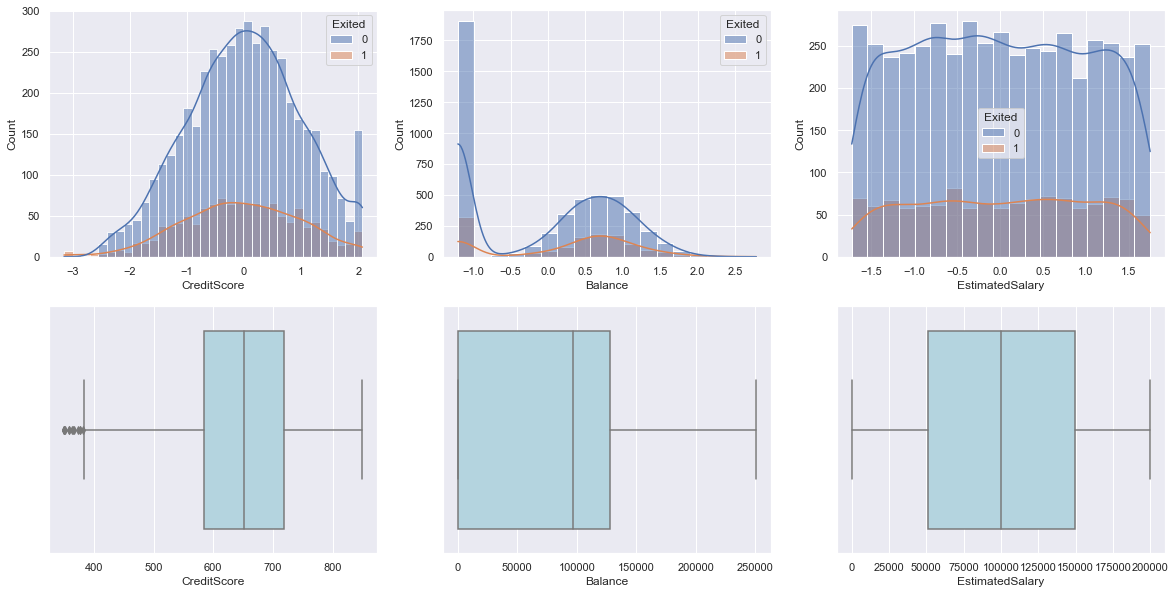

<Figure size 432x288 with 0 Axes>

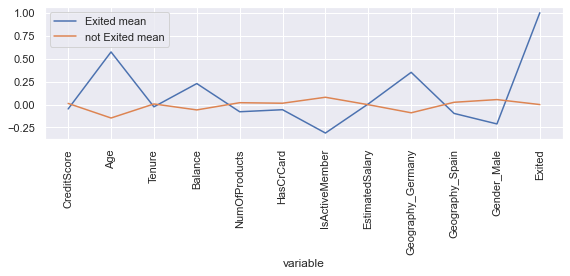

<AxesSubplot:>

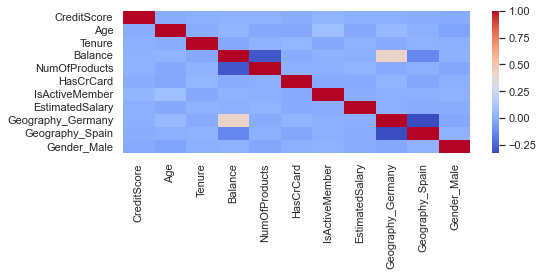

In [10]:
#################################################### distribution plot ####################################################
df_plot = df_train.copy() # this is only for vizualization but not for the model
# plotting the variable of 1 and 0 of distribution (after pre-processing)
numeric_columns = [
    'CreditScore', 'Balance', 'EstimatedSalary' #'Tenure',  'NumOfProducts', 'HasCrCard', 'Age'
]
# see all the features differences of 0 and 1 with the mean (after preprocessing)
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(20, 10))
for i, col in enumerate(numeric_columns):
    if i < 4:
        sns.histplot(df_plot, x=f"{col}", hue = "Exited", kde=True, color="skyblue", ax=axs[0, i])
        sns.boxplot(df[f'{col}'], color='lightblue', ax=axs[1,i])
    # else:
    #     sns.histplot(df_plot, x=f"{col}", hue = "Exited", kde=True, color="skyblue", ax=axs[2, i-4])
    #     sns.boxplot(df[f'{col}'], color='lightblue', ax=axs[3,i-4])
plt.figure()

##################################################### snake plot ####################################################
# Note rthat we take a look at the scalar data (but not really apply the scalar here, we should apply after the split
scaler = StandardScaler()
# df_plot[numeric_columns] = scaler.fit_transform(df_plot[numeric_columns])
# withot 'Exited', fit_transform with the other columns
col_names = df_plot.columns
df_plot[col_names] = scaler.fit_transform(df_plot[col_names])
df_plot['Exited'] = df_train['Exited']
# Plot out to see the mean of the data
df_Exited_describe  = df_plot[df_plot['Exited']==1].describe()
df_not_Exited_describe  = df_plot[df_plot['Exited']==0].describe()
df_Exited_mean = df_Exited_describe.iloc[1:2]
df_not_Exited_mean = df_not_Exited_describe.iloc[1:2]
df_Exited_mean_transposed = df_Exited_mean.T 
df_not_Exite_mean_transposed = df_not_Exited_mean.T 

df_Exited_mean_transposed['variable'] = df_Exited_mean_transposed.index
df_not_Exite_mean_transposed['variable'] = df_not_Exite_mean_transposed.index
df_Exited_mean_transposed = df_Exited_mean_transposed.rename(columns={'mean': 'Exited mean'}, index={'variable': 'variable'})
df_not_Exite_mean_transposed = df_not_Exite_mean_transposed.rename(columns={'mean': 'not Exited mean'}, index={'variable': 'variable'})

plt.rcParams["figure.figsize"] = [8, 4]
plt.rcParams["figure.autolayout"] = True

ax = df_Exited_mean_transposed.plot(x='variable', y='Exited mean')
df_not_Exite_mean_transposed.plot(ax=ax, x='variable', y='not Exited mean')

plt.xticks(range(len(df_Exited_mean_transposed['variable'])),list(df_not_Exite_mean_transposed['variable']),rotation=90)
plt.show()

#################################################### the correlation Plot ####################################################
sns.heatmap(X_train.corr(), cmap='coolwarm')

In [10]:
# ### Dealing with categorical data
# ### Feature engineering - try and do different things here (??Maybe do this after baseline models??)
# def new_features (df):

#     # Feature engineering
#     df['NewAge'] = pd.cut(df.Age, bins = [18, 26, 42, 58, 68, 77, 100], 
#                       labels = [1,2,3,4,5,6],include_lowest = True)
# # source: 'age range by generation'   beresfordresearch.com/age-range-by-generation/
#     df["NewCreditsScore"] = pd.qcut(df['CreditScore'], 6, labels = [1, 2, 3, 4, 5, 6])
#     df["NewEstSalaryScore"] = pd.qcut(df['EstimatedSalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
#     df.drop(columns=['Age','CreditScore', 'EstimatedSalary'],inplace=True)
    
#     return df

# new_features (df)


### Feature Scaling (defining a function to combine scaling, engineering, and categorcial dealing and to apply to the test set)

# 4. Naive Model
Predict the majority class for each observation

In [11]:
# Naive expectation
#   What is our exited expectation without any knowledge

print('''
Our Naive expectations:
======================
Percentage of customers which exited from the bank : {}%
'''.format(round(df["Exited"].mean()*100,2)))

# in the dataset 1 is exited and 0 is remain. In our dataset 20% of the population exited
# So our naive expectation is that a model with no knowledge would predict that everyone remain, and be 80% accurate


Our Naive expectations:
Percentage of customers which exited from the bank : 20.37%



# 5. Baseline Model: Logistic Regression

confusion matrix function for the classifier usage

In [12]:
# Creating the confusion matrix for the baseline and other models using
def c_m(y_test, y_pred):
    # Creating the confusion matrix
    cm = confusion_matrix(y_test,y_pred)
    TN = cm[0][0]
    FP = cm[0][1]
    FN = cm[1][0]
    TP = cm[1][1]

    # Visualizing the Confusion Matrix
    fig = plt.figure()
    ax1 = fig.add_subplot(1,1,1)
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.ylabel('Actual Results')
    plt.xlabel('Predicted Results')
    ax1.xaxis.set_label_position("top")

    print("Model's Accuracy:", (TP+TN)/(TN+TP+FN+FP))
    print("Model's Misclassification:", (FP+FN)/(TN+TP+FN+FP))
    print("Model's Specificity:", TN/(FP+TN))
    print("Model's Sensitivity:", TP/(TP+FN))

In [13]:
# Train logistic model on the training set
logm_train = LogisticRegression(max_iter=2000).fit(X_train,Y_train.values.ravel()) 
print("Intercept = ",logm_train.intercept_)
print("Model coefficients = ", logm_train.coef_)
print("R^2 =",logm_train.score(X_train, Y_train))

Intercept =  [-1.02649409]
Model coefficients =  [[-0.05856876  0.76595827 -0.03360309  0.16628818 -0.04138279 -0.0736264
  -1.08769911  0.01344806  0.83466233  0.0485198  -0.52628182]]
R^2 = 0.8095


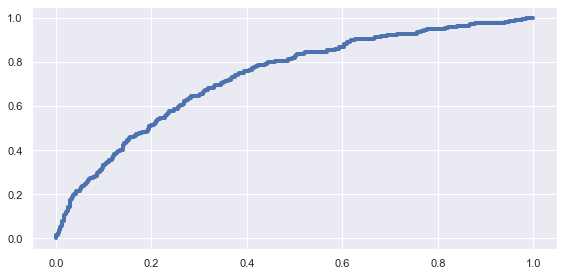

roc_auc_score 0.7350450509628754
Threshold =  0.1750118436179858


In [14]:
# Use validation set to pick right threshold
# fit the validation data to the trian model
Y_probs =logm_train.predict_proba(X_valid)[:,1]
# get the fpr tpr score
fpr, tpr, thresholds = metrics.roc_curve(Y_valid,Y_probs)
plt.plot(fpr, tpr, linewidth=4)
plt.show()
#check the ROC score
print('roc_auc_score',roc_auc_score(Y_valid,Y_probs))
# get the threshold
threshold = thresholds[np.argmax(tpr - fpr)]
print("Threshold = ",threshold)

In [15]:
# Retraining the final model with training+validation
train_val_X = pd.concat([X_train, X_valid])
train_val_Y = pd.concat([Y_train, Y_valid])

logm = LogisticRegression(max_iter=2000).fit(train_val_X, train_val_Y.values.ravel())
print("Intercept = ",logm.intercept_)
print("Model coefficients = ", logm.coef_)
print("R^2 =",logm.score(train_val_X, train_val_Y))

Y_probs_val =logm.predict_proba(X_valid)[:,1]
Y_pred_val = np.where(Y_probs_val > threshold, 1, 0) #imput the threshold
cm = confusion_matrix(Y_valid,Y_pred_val)
print(metrics.accuracy_score(Y_valid,Y_pred_val))

Intercept =  [-1.04492256]
Model coefficients =  [[-0.06037502  0.73777081 -0.03824067  0.175221   -0.06389525 -0.06584423
  -1.01251856  0.02636659  0.7861512   0.07896721 -0.54637914]]
R^2 = 0.8088
0.636


Accuracy =  0.6624
[[1263  728]
 [ 116  393]]


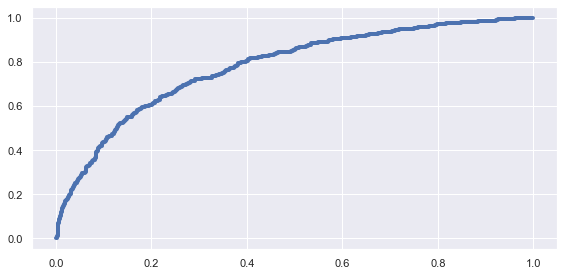

0.7787548881558368

In [16]:
# Test the accuracy of training + validation logistic model on the testing set
# test dataset to check accuracy_score
Y_probs_test =logm.predict_proba(X_test)[:,1]
Y_pred_test = np.where(Y_probs_test > threshold, 1, 0) #imput the threshold
cm = confusion_matrix(Y_test,Y_pred_test)
TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]
print("Accuracy = ",(TP+TN)/(TP+TN+FP+FN)) # or metrics.accuracy_score(Y_test,Y_pred_test)
print(cm)

# get the fpr tpr score
fpr, tpr, thresholds = metrics.roc_curve(Y_test,Y_probs_test)
plt.plot(fpr, tpr, linewidth=4)
plt.show()
#check the ROC score
roc_auc_score(Y_test,Y_probs_test)

Model's Accuracy: 0.6624
Model's Misclassification: 0.3376
Model's Specificity: 0.6343545956805625
Model's Sensitivity: 0.7721021611001965


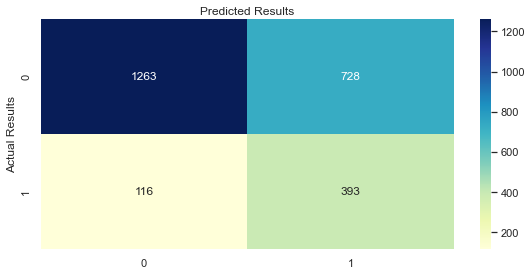

In [17]:
c_m(Y_test, Y_pred_test)

In [18]:
# create the dataframe to record the results
df_results = pd.DataFrame(columns=['model', 'accuracy_valid','accuracy_test','Misclassification', 'Specificity', 'Sensitivity'])
# add the results to the dataframe
df_results.loc[0] = [
                    'Logistic Regression',
                    metrics.accuracy_score(Y_valid,Y_pred_val),
                    metrics.accuracy_score(Y_test,Y_pred_test),
                    (FP+FN)/(TN+TP+FN+FP),
                     TN/(FP+TN), TP/(TP+FN)
                     ]

# get the variable names of train_val_X to list
train_val_X_var = list(train_val_X.columns)

# create the dataframe to record the coiefficients of the model
df_varaible = pd.DataFrame(columns=['variable_name', 'coef_logm'])
df_varaibles = pd.DataFrame(X_train.columns)
for i in range(len(df_varaibles)):
    if i != 8:
        df_varaible.loc[i] = [train_val_X_var[i], logm.coef_[0][i]]

df_varaible

,variable_name,coef_logm
0,CreditScore,-0.060375
1,Age,0.737771
2,Tenure,-0.038241
3,Balance,0.175221
4,NumOfProducts,-0.063895
5,HasCrCard,-0.065844
6,IsActiveMember,-1.012519
7,EstimatedSalary,0.026367
9,Geography_Spain,0.078967
10,Gender_Male,-0.546379


In [19]:
df_results

,model,accuracy_valid,accuracy_test,Misclassification,Specificity,Sensitivity
0,Logistic Regression,0.636,0.6624,0.3376,0.634355,0.772102


# 6. Classifiers Model

## 6.1. Random Forest Model

Discription:
A systematic random forest classifer modeling approach including baseline line model building, fine tuning and fianl model builing was applid. Firstly, an unoptimizeed random forest classifier was designed to be used as a baseline for comparison with the optimized classifiers. The base random forest model has a overall accuracy of about 85.5% and a miscalssification of about 14.5%. A randomized search was then used to find the optimal parameters for the classifier, given that the hyperparametter search space is large and randomized search provides more control over the computing budget. The optimal parameters for the random forest classifier were found to be the following:

* 'min_samples_split': 5

* 'min_samples_leaf': 2

* 'max_features': 'auto'

* 'max_depth': 110,

* 'criterion': 'gini'

* 'bootstrap': True
  
After that, new classifier was created by using the optimal parameters. It showed slightly improvement on all the metrics compared with previous model, improving accuracy to 86.13% and reducing misclassification rate to 12.34%. Notably, Model's specificity and sensitivity increasd to 87.7% and 75.2% respectly, which is significant since mistakenly classifying a customer as a churner can be very costly to the company. Furthermore, feature importance analysis indicates age (27%), number of products(15%), balance(11%) and estimated salary(12%) as well as credit score top four most important features for the model.

Unoptimised Tree Accuracy
Model's Accuracy: 0.8546666666666667
Model's Misclassification: 0.14533333333333334
Model's Specificity: 0.8691376701966718
Model's Sensitivity: 0.7471910112359551


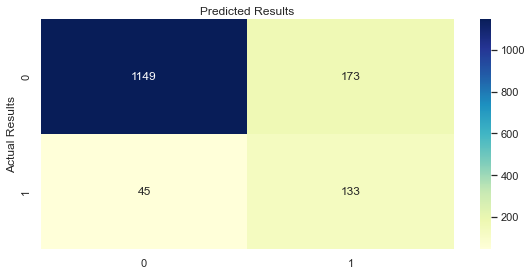

In [20]:
# ---+ step 1 build an unpotimised model
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, Y_train)
print('Unoptimised Tree Accuracy')
# get the confusion matrix
y_pred = rf.predict(X_valid)   
print('==================')
c_m(y_pred, Y_valid) 

In [22]:
# ---+ step 2 define a grid of parameters to search over
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 100, num = 11)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in  np.linspace(start = 1, stop = 110, num = 12)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1, 2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Criterion
criterion=['gini', 'entropy']
# purity of the leaf nodes

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'criterion': criterion}

# print out the random grid
pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['gini', 'entropy'],
 'max_depth': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4],
 'min_samples_split': [1, 2, 5, 10],
 'n_estimators': [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}


In [23]:
# ---+ step 3 use the grid to search for best model
# create the base model to tune
rf = RandomForestClassifier(random_state=0)
# random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 4)
# fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=50, criterion=entropy, bootstrap=False 
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=50, criterion=entropy, bootstrap=False 
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=50, criterion=entropy, bootstrap=False 
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=50, criterion=entropy, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=50, criterion=entropy, bootstrap=False, total=   0.6s
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=50, criterion=entropy, bootstrap=False, total=   0.6s
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=50, criterion=entropy, bootstrap=False, total=   0.7s
[CV] n_estimators

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    6.0s


[CV]  n_estimators=40, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, criterion=gini, bootstrap=True, total=   0.2s
[CV] n_estimators=40, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, criterion=gini, bootstrap=True 
[CV]  n_estimators=90, min_samples_split=10, min_samples_leaf=3, max_features=sqrt, max_depth=80, criterion=entropy, bootstrap=False, total=   0.7s
[CV] n_estimators=40, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, criterion=gini, bootstrap=True 
[CV]  n_estimators=40, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, criterion=gini, bootstrap=True, total=   0.2s
[CV] n_estimators=40, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, criterion=gini, bootstrap=True 
[CV]  n_estimators=40, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=None, criterion=gini, bootstrap=True, total=   0.2s
[CV] n_estimators=20, min_s

/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/georgesta

[CV]  n_estimators=20, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=40, criterion=gini, bootstrap=True, total=   0.1s
[CV] n_estimators=100, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=20, criterion=gini, bootstrap=True 
[CV]  n_estimators=20, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=40, criterion=gini, bootstrap=True, total=   0.1s
[CV] n_estimators=20, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60, criterion=gini, bootstrap=True 
[CV]  n_estimators=20, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60, criterion=gini, bootstrap=True, total=   0.1s
[CV] n_estimators=20, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60, criterion=gini, bootstrap=True 
[CV]  n_estimators=20, min_samples_split=2, min_samples_leaf=4, max_features=sqrt, max_depth=60, criterion=gini, bootstrap=True, total=   0.1s
[CV] n_estimators=20, min_samples_split=2, 

/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/georgesta

[CV]  n_estimators=70, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=50, criterion=gini, bootstrap=True, total=   0.0s
[CV] n_estimators=70, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=50, criterion=gini, bootstrap=True 
[CV]  n_estimators=20, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=80, criterion=gini, bootstrap=True, total=   0.1s
[CV] n_estimators=20, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=80, criterion=gini, bootstrap=True 
[CV]  n_estimators=70, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=50, criterion=gini, bootstrap=True, total=   0.0s
[CV] n_estimators=70, min_samples_split=1, min_samples_leaf=4, max_features=auto, max_depth=50, criterion=gini, bootstrap=True 
[CV]  n_estimators=80, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=70, criterion=gini, bootstrap=True, total=   0.4s
[CV] n_estimators=80, min_samples_split=2, m

/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/georgesta

[CV]  n_estimators=80, min_samples_split=2, min_samples_leaf=3, max_features=sqrt, max_depth=70, criterion=gini, bootstrap=True, total=   0.4s
[CV] n_estimators=30, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=100, criterion=gini, bootstrap=True 
[CV]  n_estimators=90, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=110, criterion=entropy, bootstrap=True, total=   0.5s
[CV]  n_estimators=30, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=100, criterion=gini, bootstrap=True, total=   0.1s
[CV] n_estimators=30, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=100, criterion=gini, bootstrap=True 
[CV] n_estimators=30, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=100, criterion=gini, bootstrap=True 
[CV]  n_estimators=30, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=100, criterion=gini, bootstrap=True, total=   0.1s
[CV] n_estimators=30, min_sam

/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/georgesta

[CV]  n_estimators=10, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=30, criterion=gini, bootstrap=False, total=   0.0s
[CV] n_estimators=10, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=30, criterion=gini, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=30, criterion=gini, bootstrap=False, total=   0.0s
[CV] n_estimators=10, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=30, criterion=gini, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=30, criterion=gini, bootstrap=False, total=   0.0s
[CV] n_estimators=10, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=30, criterion=gini, bootstrap=False 
[CV]  n_estimators=10, min_samples_split=1, min_samples_leaf=2, max_features=auto, max_depth=30, criterion=gini, bootstrap=False, total=   0.0s
[CV] n_estimators=70, min_samples_spl

/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/georgesta

[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=50, criterion=gini, bootstrap=False 
[CV]  n_estimators=30, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, criterion=gini, bootstrap=False, total=   0.2s
[CV] n_estimators=30, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, criterion=gini, bootstrap=False 
[CV]  n_estimators=30, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=30, criterion=gini, bootstrap=False, total=   0.2s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=50, criterion=gini, bootstrap=False 
[CV]  n_estimators=70, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, criterion=entropy, bootstrap=True, total=   0.4s
[CV] n_estimators=70, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=100, criterion=entropy, bootstrap=True 
[CV]  n_estimators=30, min_samples_split=5, mi

/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/georgesta

[CV]  n_estimators=100, min_samples_split=2, min_samples_leaf=3, max_features=auto, max_depth=20, criterion=entropy, bootstrap=False, total=   0.7s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, criterion=gini, bootstrap=True 
[CV]  n_estimators=60, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=80, criterion=gini, bootstrap=True, total=   0.3s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, criterion=gini, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, criterion=gini, bootstrap=True, total=   0.2s
[CV] n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, criterion=gini, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, criterion=gini, bootstrap=True, total=   0.3s
[CV] n_estimators=90, min_samples_

/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/georgesta

[CV]  n_estimators=90, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=20, criterion=gini, bootstrap=True, total=   0.0s
[CV] n_estimators=90, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=20, criterion=gini, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=110, criterion=gini, bootstrap=True, total=   0.2s
[CV] n_estimators=90, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=20, criterion=gini, bootstrap=True 
[CV]  n_estimators=90, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=20, criterion=gini, bootstrap=True, total=   0.1s
[CV] n_estimators=90, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=20, criterion=gini, bootstrap=True 
[CV]  n_estimators=90, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=20, criterion=gini, bootstrap=True, total=   0.1s
[CV] n_estimators=90, min_samples_split=1, 

/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/georgesta

[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, criterion=entropy, bootstrap=True, total=   0.5s
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, criterion=entropy, bootstrap=True, total=   0.5s
[CV] n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, criterion=entropy, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, criterion=entropy, bootstrap=True, total=   0.5s
[CV] n_estimators=70, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=1, criterion=gini, bootstrap=True 
[CV]  n_estimators=100, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=30, criterion=entropy, bootstrap=True, total=   0.5s
[CV] n_estimators=70, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=1, criterion=gini, bootstrap=True 
[CV] n_estimators=70,

/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/georgesta

[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=20, criterion=gini, bootstrap=True, total=   0.3s
[CV] n_estimators=60, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=80, criterion=entropy, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=20, criterion=gini, bootstrap=True, total=   0.3s
[CV] n_estimators=40, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=20, criterion=gini, bootstrap=True 
[CV]  n_estimators=40, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=20, criterion=gini, bootstrap=True, total=   0.0s
[CV] n_estimators=40, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=20, criterion=gini, bootstrap=True 
[CV]  n_estimators=40, min_samples_split=1, min_samples_leaf=4, max_features=sqrt, max_depth=20, criterion=gini, bootstrap=True, total=   0.0s
[CV] n_estimators=40, min_samples_split=1

/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/georgesta

[CV] n_estimators=40, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=110, criterion=entropy, bootstrap=True 
[CV]  n_estimators=60, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=80, criterion=entropy, bootstrap=True, total=   0.4s
[CV] n_estimators=60, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=80, criterion=entropy, bootstrap=True 
[CV]  n_estimators=40, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=110, criterion=entropy, bootstrap=True, total=   0.2s
[CV] n_estimators=40, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=110, criterion=entropy, bootstrap=True 
[CV]  n_estimators=60, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=80, criterion=entropy, bootstrap=True, total=   0.4s
[CV] n_estimators=60, min_samples_split=2, min_samples_leaf=2, max_features=sqrt, max_depth=80, criterion=entropy, bootstrap=True 
[CV]  n_estimators=40, min_sampl

/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/georgesta

[CV] n_estimators=60, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=10, criterion=gini, bootstrap=True 
[CV]  n_estimators=90, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=90, criterion=entropy, bootstrap=True, total=   0.4s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, criterion=entropy, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, criterion=entropy, bootstrap=False, total=   0.1s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, criterion=entropy, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, criterion=entropy, bootstrap=False, total=   0.1s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=1, criterion=entropy, bootstrap=False [CV]  n_estimators=60, min_samples_

/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/georgesta

[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, criterion=gini, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, criterion=gini, bootstrap=False, total=   0.2s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, criterion=gini, bootstrap=False 
[CV]  n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, criterion=gini, bootstrap=False, total=   0.2s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, criterion=gini, bootstrap=False 
[CV]  n_estimators=80, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=40, criterion=entropy, bootstrap=False, total=   0.6s
[CV] n_estimators=70, min_samples_split=10, min_samples_leaf=3, max_features=auto, max_depth=10, criterion=entropy, bootstrap=True 
[CV]  n_estimators=50, min_samples_split

/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/sklearn/ensemble/_forest.py", line 392, in fit
    for i, t in enumerate(trees))
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/georgestavrakis/opt/anaconda3/envs/ADL/lib/python3.7/site-packages/joblib/parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/georgesta

[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, criterion=entropy, bootstrap=False, total=   0.7s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, criterion=entropy, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, criterion=entropy, bootstrap=False, total=   0.7s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, criterion=entropy, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, criterion=entropy, bootstrap=False, total=   0.7s
[CV] n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, criterion=entropy, bootstrap=False 
[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=100, criterion=entropy, bootstrap=False, total=   0.7s
[CV] 

[Parallel(n_jobs=4)]: Done 493 out of 500 | elapsed:   33.6s remaining:    0.5s


[CV]  n_estimators=100, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=30, criterion=entropy, bootstrap=False, total=   0.7s
[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, criterion=gini, bootstrap=True, total=   0.3s
[CV]  n_estimators=70, min_samples_split=2, min_samples_leaf=4, max_features=auto, max_depth=10, criterion=gini, bootstrap=True, total=   0.3s


[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:   33.8s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [1, 2, 5, 10],
                                        'n_estimators': [1, 10, 20, 30, 40, 50,
                                                         60, 70, 80, 90, 100]},
                   random_state=42, verbose=2)

In [24]:
# ---+ step 4 get the best parameters
rf_random.best_params_

{'n_estimators': 80,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'criterion': 'gini',
 'bootstrap': True}

In [25]:
# ---+ step 5 apply the best parameters to the model
rf = RandomForestClassifier(random_state=0, 
                            n_estimators=50, 
                            max_depth=110, 
                            min_samples_split=5, 
                            min_samples_leaf=2, 
                            bootstrap=True, 
                            max_features='auto', 
                            criterion='gini')
rf.fit(X_train, Y_train)
print('Optimised Tree Accuracy:', accuracy_score(Y_valid, rf.predict(X_valid)))

Optimised Tree Accuracy: 0.8613333333333333


In [26]:
# ---+ step 6 get feacture importance
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Age                  0.272135
NumOfProducts        0.150355
Balance              0.134039
EstimatedSalary      0.120361
CreditScore          0.118656
Tenure               0.069630
IsActiveMember       0.052281
Geography_Germany    0.034205
Gender_Male          0.020743
HasCrCard            0.015929
Geography_Spain      0.011667
dtype: float64

Model's Accuracy: 0.8613333333333333
Model's Misclassification: 0.13866666666666666
Model's Specificity: 0.877488514548239
Model's Sensitivity: 0.7525773195876289


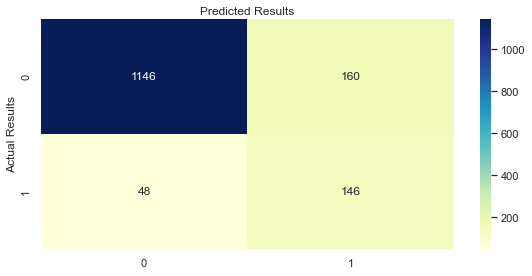

In [27]:
# ---+ step 7 get the confusion matrix
y_pred_val = rf.predict(X_valid)   
print('==================')
c_m(y_pred_val, Y_valid)

Model's Accuracy: 0.8672
Model's Misclassification: 0.1328
Model's Specificity: 0.8803301237964236
Model's Sensitivity: 0.7774294670846394


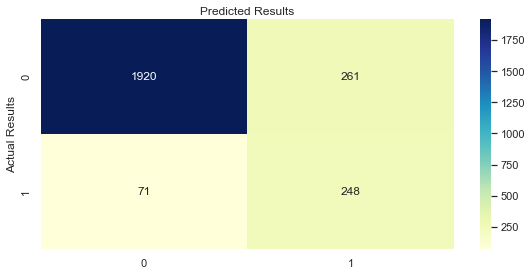

In [28]:
y_pred_test = rf.predict(X_test)
c_m(y_pred_test, Y_test)

In [29]:
# add the results to the df_results
df_results.loc[1] = [
                    'Random Forest',
                    metrics.accuracy_score(Y_valid,y_pred_val),
                    metrics.accuracy_score(Y_test,y_pred_test),
                    (1-metrics.accuracy_score(Y_test,y_pred_test)),
                    0.8826507132995858,
                    0.7767584097859327
                        ]
df_results

,model,accuracy_valid,accuracy_test,Misclassification,Specificity,Sensitivity
0,Logistic Regression,0.636000,0.6624,0.3376,0.634355,0.772102
1,Random Forest,0.861333,0.8672,0.1328,0.882651,0.776758


In [30]:
df_varaible['var_imp_RF'] = 0
# feature_scores to dataframe
df_feature_scores = pd.DataFrame(feature_scores)
df_feature_scores.reset_index(inplace=True)
df_feature_scores.columns = ['variable_name', 'var_imp_RF']
df_feature_scores_list = df_feature_scores['variable_name'].tolist()

for i in range(len(df_feature_scores_list)):
    df_varaible.loc[df_varaible['variable_name']==f"{df_feature_scores_list[i]}",'var_imp_RF'] = df_feature_scores['var_imp_RF'][i]

df_varaible

,variable_name,coef_logm,var_imp_RF
0,CreditScore,-0.060375,0.118656
1,Age,0.737771,0.272135
2,Tenure,-0.038241,0.069630
3,Balance,0.175221,0.134039
4,NumOfProducts,-0.063895,0.150355
5,HasCrCard,-0.065844,0.015929
6,IsActiveMember,-1.012519,0.052281
7,EstimatedSalary,0.026367,0.120361
9,Geography_Spain,0.078967,0.011667
10,Gender_Male,-0.546379,0.020743


## 6.2. SVM Model

without tuning

In [31]:
# concat the training and validation sets
X_train_val = pd.concat([X_train, X_valid])
Y_train_val = pd.concat([Y_train, Y_valid])
print(X_train_val.shape, Y_train_val.shape)
print("==================")
print(X_test.shape, Y_test.shape)

# benchmarking SVM
svm_model = svm.SVC(kernel='linear',
                     C=1, 
                     gamma='auto',
                      random_state=42)
# svm_model.fit(X_train_val, Y_train_val.values.ravel())
scores = cross_val_score(svm_model, X_train_val, Y_train_val, cv=10)
# scores
print("==================")
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# predict the test set
svm_model = svm.SVC(kernel='linear',
                 gamma='auto', 
                 C=1, 
                 random_state=42).fit(X_train_val, Y_train_val)
svm_model.score(X_test, Y_test)

# predict on the validation set
predictions = svm_model.predict(X_test)

# # accuracy_score
# print(svm_model.score(X_train,Y_train))
# print(svm_model.score(X_valid, Y_valid))

#載入classification report & confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
print("==================")
print(confusion_matrix(Y_test,predictions))
print('\n')
print(classification_report(Y_test,predictions))

(7500, 11) (7500,)
(2500, 11) (2500,)
0.80 accuracy with a standard deviation of 0.00
[[1991    0]
 [ 509    0]]


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1991
           1       0.00      0.00      0.00       509

    accuracy                           0.80      2500
   macro avg       0.40      0.50      0.44      2500
weighted avg       0.63      0.80      0.71      2500



parameter adjusting

In [32]:
#結果發現，分類結果都只出現在特定的類別，所以要修正模型
#載入GridSearchCV
# kernel = 'linear', 'poly', 'rbf', 'sigmoid'
# C (penalty): the defult is 1
# higher C means less regularization, but lower will be too overfitted
# gamma (kernel coefficient): the default is 1/n_features
# ’scale’: 1/ (n_features * (n_features + 1) / 2) (default)
# ’auto’: 1/n_features if n_features > 1, otherwise 1

svm_model_modify = SVC(kernel = 'linear') # 這邊先建立未調參前的模型
#使用Support Vector Classifier來建立模型
svm_model_modify.fit(X_train_val,Y_train_val)

from sklearn.model_selection import GridSearchCV
#GridSearchCV是建立一個dictionary來組合要測試的參數
param_grid = {
        'C':[0.1,1,10,100,1000],
        'gamma':[1,0.1,0.01,0.001,0.0001],
        # 'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
        # 'gamma': ['scale', 'auto']
        }
        
#GridSearchCV算是一個meta-estimator，參數中帶有estimator，像是SVC。
# 重點是會創造一個新的estimator，但又表現得一模一樣，
# 也就是estimator=SVC時，就是作為分類器
#Verbose可設定為任一整數，它只是代表數字越高，文字解釋越多
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [33]:
#利用剛剛設定的參數來找到最適合的模型
grid.fit(X_train_val,Y_train_val)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=0.1, gamma=1, score=0.797, total=   0.7s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.797, total=   0.7s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.796, total=   0.7s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.796, total=   0.7s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.796, total=   0.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.823, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.815, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.817, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.817, total=   0.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:  1.8min finished


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [34]:
#顯示最佳estimator參數
grid.best_estimator_

SVC(C=1000, gamma=0.01)

In [35]:
#利用剛剛的最佳參考再重新預測測試組
grid_predictions_val = grid.predict(X_valid)
grid_predictions = grid.predict(X_test)

#評估新參考的預測結果好壞
print(confusion_matrix(Y_test,grid_predictions))
print('\n')
print(classification_report(Y_test,grid_predictions))

[[1940   51]
 [ 291  218]]


              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1991
           1       0.81      0.43      0.56       509

    accuracy                           0.86      2500
   macro avg       0.84      0.70      0.74      2500
weighted avg       0.86      0.86      0.85      2500



Model's Accuracy: 0.86
Model's Misclassification: 0.14
Model's Specificity: 0.9765494137353434
Model's Sensitivity: 0.40522875816993464


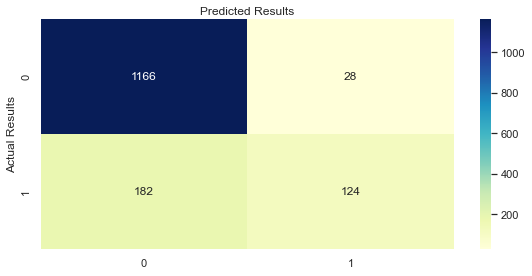

In [36]:
c_m(Y_valid, grid_predictions_val)

Model's Accuracy: 0.8632
Model's Misclassification: 0.1368
Model's Specificity: 0.9743847312908086
Model's Sensitivity: 0.42829076620825146


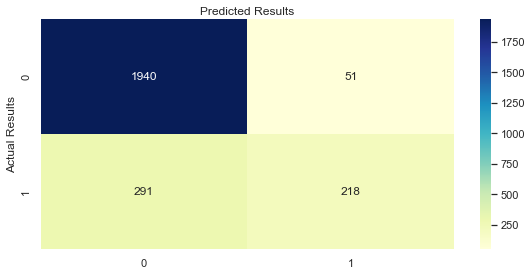

In [37]:
c_m(Y_test, grid_predictions)


In [38]:
# from matplotlib import pyplot as plt
# from sklearn import svm

# def f_importances(coef, names):
#     imp = coef
#     imp,names = zip(*sorted(zip(imp,names)))
#     plt.barh(range(len(names)), imp, align='center')
#     plt.yticks(range(len(names)), names)
#     plt.show()

# features_names = X_train_val.columns
# f_importances(grid.best_estimator_.coef_, features_names)

# add the results to the df_results
df_results.loc[2] = [
                    'SVM',
                    0.860000000000,
                    0.863200000000,
                    (1-0.863200000000),
                    0.9743847312908086,
                    0.42829076620825146
                        ]
df_results


,model,accuracy_valid,accuracy_test,Misclassification,Specificity,Sensitivity
0,Logistic Regression,0.636000,0.6624,0.3376,0.634355,0.772102
1,Random Forest,0.861333,0.8672,0.1328,0.882651,0.776758
2,SVM,0.860000,0.8632,0.1368,0.974385,0.428291


## 6.3. Decision Tree

First lets create a basic unpotimised tree

Unoptimised Model Depth: 22
Unoptimised Tree Training Accuracy: 1.0
Unoptimised Tree Validation Accuracy: 0.7946666666666666


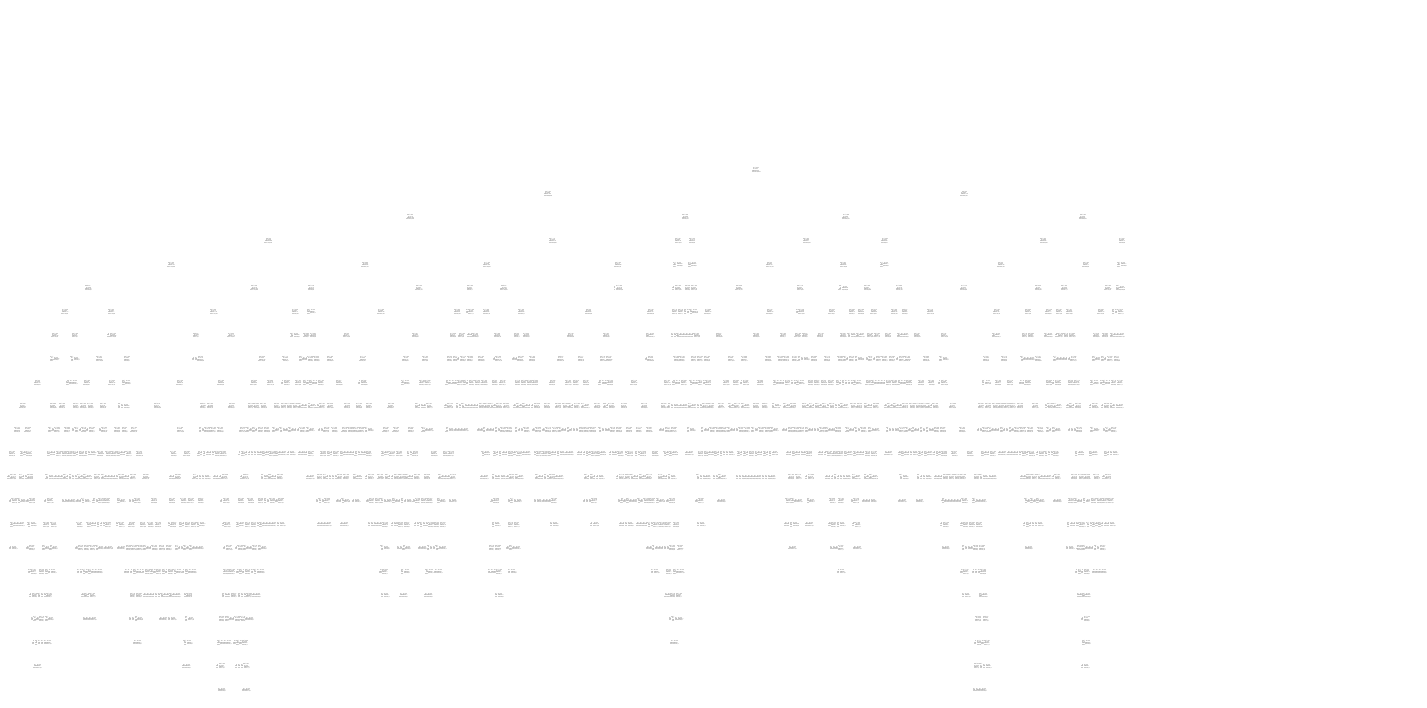

In [39]:

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)
fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))
sk.tree.plot_tree(clf, ax=ax) 
print('Unoptimised Model Depth:',clf.tree_.max_depth)
print('Unoptimised Tree Training Accuracy:', accuracy_score(Y_train, clf.predict(X_train)))
print('Unoptimised Tree Validation Accuracy:', accuracy_score(Y_valid, clf.predict(X_valid)))

The tree is too deep at this point and might be prone to overfitting due to the number of splits. 
As seen in the training vs validation accuracy, there is massive overfitting, thus needing pruning.

Model's Accuracy: 0.7946666666666666
Model's Misclassification: 0.20533333333333334
Model's Specificity: 0.8685092127303182
Model's Sensitivity: 0.5065359477124183


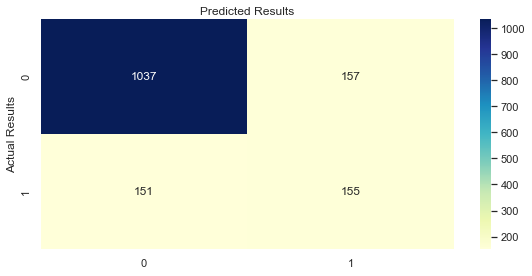

In [40]:
Y_predict = clf.predict(X_valid)
c_m(Y_valid, Y_predict)

There is 20.5% misclassification, which is too high.

In [41]:
# Looking at the feature importance
pd.DataFrame({'Features':X_train.columns, 'Importance': clf.feature_importances_}).sort_values('Importance', ascending=False)

,Features,Importance
1,Age,0.234988
3,Balance,0.156385
7,EstimatedSalary,0.146174
0,CreditScore,0.138169
4,NumOfProducts,0.114494
2,Tenure,0.077845
6,IsActiveMember,0.054930
8,Geography_Germany,0.024388
10,Gender_Male,0.023792
5,HasCrCard,0.018236


According to the Decision Tree, Age, Balance, and Estimated Salary are the top 2 important features in predicting if a customer will churn.

#### Pruning - choosing the right complexity parameter (alpha)
As alpha increases, so does the impurity of the leaves. The graph shows different values of alpha and the corresponding impurities.
The goal is to pick an alpha that renders a tree that is not very impure and with not too many splits that it overfits.
Seems like the value may lie between 0 and 0.005. 


Text(0, 0.5, 'total impurity of leaves')

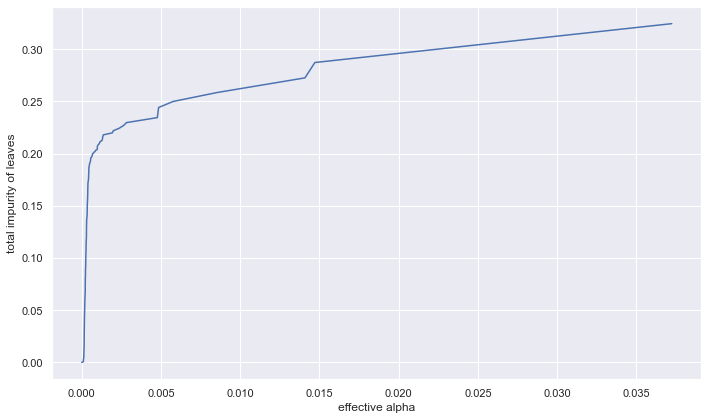

In [42]:
clf=DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, Y_train) #computing the alpha and corresponding impurities
ccp_alphas, impurities = path.ccp_alphas, path.impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("effective alpha")
plt.ylabel("total impurity of leaves")


In [43]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

Text(0, 0.5, 'total depth')

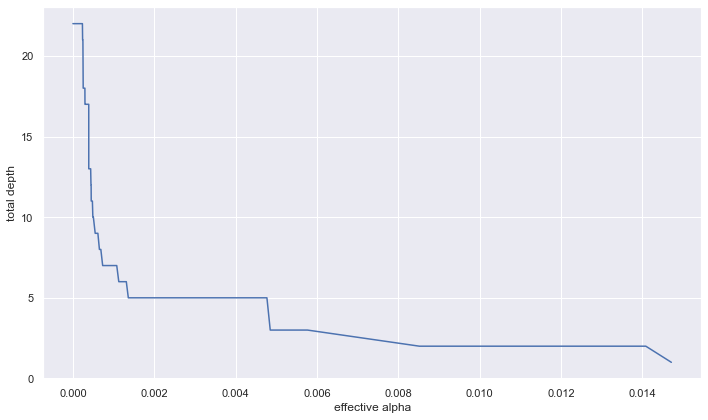

In [44]:
tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1])
plt.xlabel("effective alpha")
plt.ylabel("total depth")

As alpha increases, the depth of the tree decreases, in other words, the complexity decreases. The best point would be where the accuracy is high but the depth is relatively low

Text(0, 0.5, 'Accuracy scores')

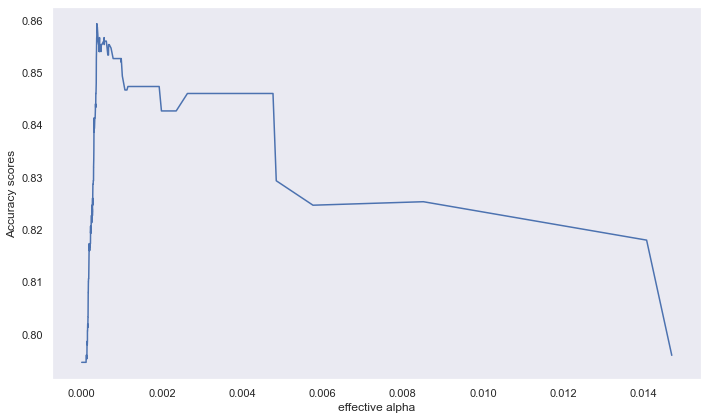

In [45]:
acc_scores = [accuracy_score(Y_valid, clf.predict(X_valid)) for clf in clfs]

tree_depths = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10,  6))
plt.grid()
plt.plot(ccp_alphas[:-1], acc_scores[:-1]) #removing the larger alpha - the last one
plt.xlabel("effective alpha")
plt.ylabel("Accuracy scores")

As seen earlier in the impurity vs alpha graph, the alpha with the highest accuracy is infact between 0 and 0.005 

[Text(590.4971590909091, 528.5, 'X[1] <= 0.354\ngini = 0.324\nsamples = 6000\nvalue = [4778, 1222]'),
 Text(336.0681818181818, 498.3, 'X[4] <= 1.647\ngini = 0.208\nsamples = 4293\nvalue = [3788, 505]'),
 Text(253.63636363636363, 468.1, 'X[4] <= -0.06\ngini = 0.184\nsamples = 4193\nvalue = [3764, 429]'),
 Text(190.22727272727272, 437.9, 'X[8] <= 0.5\ngini = 0.271\nsamples = 2058\nvalue = [1725, 333]'),
 Text(101.45454545454545, 407.70000000000005, 'X[3] <= -0.291\ngini = 0.224\nsamples = 1551\nvalue = [1352, 199]'),
 Text(50.72727272727273, 377.5, 'X[10] <= 0.5\ngini = 0.358\nsamples = 389\nvalue = [298, 91]'),
 Text(25.363636363636363, 347.3, 'X[1] <= 0.259\ngini = 0.443\nsamples = 172\nvalue = [115, 57]'),
 Text(12.681818181818182, 317.1, 'gini = 0.42\nsamples = 163\nvalue = [114, 49]'),
 Text(38.04545454545455, 317.1, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(76.0909090909091, 347.3, 'X[0] <= -2.507\ngini = 0.264\nsamples = 217\nvalue = [183, 34]'),
 Text(63.40909090909091,

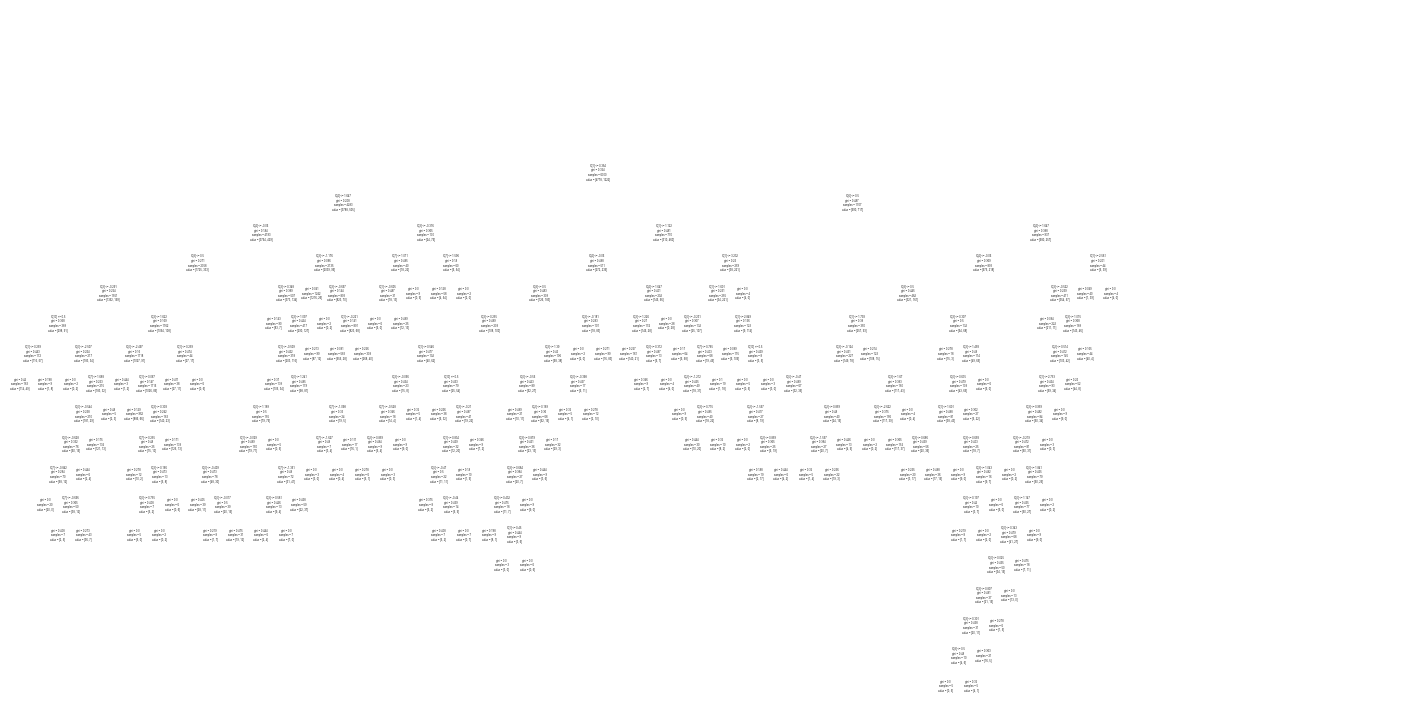

In [46]:
final_tree = clfs[np.argmax(acc_scores)]
fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))
sk.tree.plot_tree(final_tree, ax=ax)

Here, the depth of the tree has decreased, not to a great extent perhaps beacuse the dataset is such that the decision tree model needs many splits to classify the data, and hence, may not be the best classifier for this dataset. 

In [47]:
pd.DataFrame({'Features':X_train.columns, 'Importance': final_tree.feature_importances_}).sort_values('Importance', ascending=False)

,Features,Importance
1,Age,0.356442
4,NumOfProducts,0.231518
3,Balance,0.139047
6,IsActiveMember,0.091699
0,CreditScore,0.060124
8,Geography_Germany,0.046830
7,EstimatedSalary,0.031852
2,Tenure,0.023958
10,Gender_Male,0.013807
5,HasCrCard,0.004722


According to the pruned tree, Age, NumofProducts and Balance are the most important predictors - 2 of these were also part of the full tree before. The Decision Tree at least provides a good intuition into how features can help understand a customer's potential churn, and therefore, the stimuli for businesses to focus on for retaining customers.

In [48]:
print('Optimised Model Alpha:', ccp_alphas[np.argmax(acc_scores)])
print('Optimised Model Depth:', tree_depths[np.argmax(acc_scores)])
print('Optimised Tree Training Accuracy:', accuracy_score(Y_train, final_tree.predict(X_train)))
print('Optimised Model Validation Accuracy:', np.max(acc_scores))

Optimised Model Alpha: 0.0003771547022924014
Optimised Model Depth: 17
Optimised Tree Training Accuracy: 0.8981666666666667
Optimised Model Validation Accuracy: 0.8593333333333333


The overfitting issue has much reduced now after pruning the tree as the difference between the training and validation accuracies is much less and validation accuracy is also much higher, despite the depth of 17.

Model's Accuracy: 0.8593333333333333
Model's Misclassification: 0.14066666666666666
Model's Specificity: 0.9522613065326633
Model's Sensitivity: 0.49673202614379086


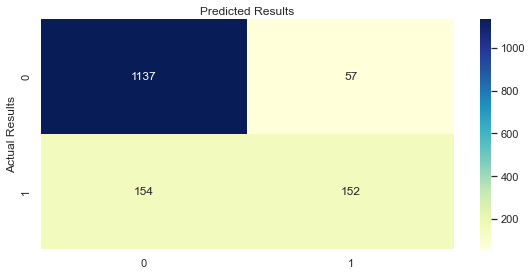

In [49]:
# confusion matrix
Y_predict = final_tree.predict(X_valid)
c_m(Y_valid, Y_predict)

Model's Accuracy: 0.8512
Model's Misclassification: 0.1488
Model's Specificity: 0.9331993972877951
Model's Sensitivity: 0.5304518664047151


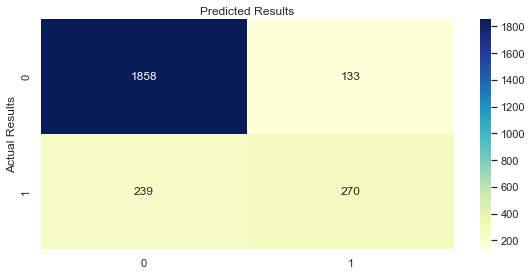

In [50]:
Y_predict_test = final_tree.predict(X_test)
c_m(Y_test, Y_predict_test)

The misclassification rate has also improved to 14% (still not ideal) as 14/100 customers will still be incorrectly predicted. More errors are on the side of False Negatives i.e. more customers are being classified as not churning (approx 50%) than actually are churning. It is important to note that the dataset on hand is also somewhat unbalanced with 80% not churning and 20% churning observations - the model perhaps built on to this imbalance and naturally learnt to predict more people as not churning. This issue must be tackled using a more representative dataset or changing the Machine Learning approach behind it. 

In [51]:
# record the results
df_results.loc[3] = [
                    'Decision Tree',
                    0.8593333333333333, 
                    0.8512, 
                    (1-0.8512),
                    0.9331993972877951,
                    0.5304518664047151,
                        ]
df_results

,model,accuracy_valid,accuracy_test,Misclassification,Specificity,Sensitivity
0,Logistic Regression,0.636000,0.6624,0.3376,0.634355,0.772102
1,Random Forest,0.861333,0.8672,0.1328,0.882651,0.776758
2,SVM,0.860000,0.8632,0.1368,0.974385,0.428291
3,Decision Tree,0.859333,0.8512,0.1488,0.933199,0.530452


In [52]:
DT_df = pd.DataFrame({'Features':X_train.columns, 'Importance': final_tree.feature_importances_}).sort_values('Importance', ascending=False)
# rename DT_df
DT_df.columns = ['variable_name', 'DT_Importance']
DT_df

df_varaible['DT_Importance'] = 0
# feature_scores to dataframe
df_feature_scores_list = DT_df['variable_name'].tolist()

for i in range(len(df_feature_scores_list)):
    df_varaible.loc[df_varaible['variable_name']==f"{df_feature_scores_list[i]}",'DT_Importance'] = DT_df['DT_Importance'][i]

df_varaible

,variable_name,coef_logm,var_imp_RF,DT_Importance
0,CreditScore,-0.060375,0.118656,0.231518
1,Age,0.737771,0.272135,0.060124
2,Tenure,-0.038241,0.069630,0.031852
3,Balance,0.175221,0.134039,0.023958
4,NumOfProducts,-0.063895,0.150355,0.356442
5,HasCrCard,-0.065844,0.015929,0.000000
6,IsActiveMember,-1.012519,0.052281,0.139047
7,EstimatedSalary,0.026367,0.120361,0.091699
9,Geography_Spain,0.078967,0.011667,0.013807
10,Gender_Male,-0.546379,0.020743,0.046830


## 6.4. kNN model

In [53]:
#Default KNN model without any tuning - base metric
#k = 5

KNN_model_default = KNeighborsClassifier()
KNN_model_default.fit(X_train, Y_train)
y_pred =KNN_model_default.predict(X_train_val)
test_accuracy=accuracy_score(Y_train_val,y_pred)*100
print("Accuracy for our validation dataset without tuning is : {:.2f}%".format(test_accuracy) )

Accuracy for our validation dataset without tuning is : 86.85%


Model's Accuracy: 0.8685333333333334
Model's Misclassification: 0.13146666666666668
Model's Specificity: 0.9626590756865372
Model's Sensitivity: 0.5006544502617801


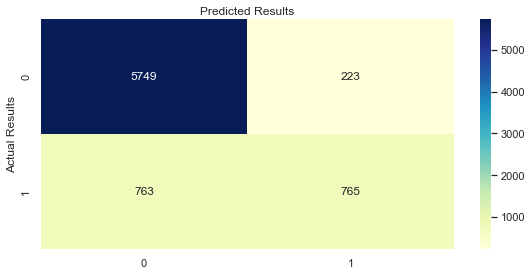

In [54]:
c_m(Y_train_val, y_pred)

In [55]:
# Optimized kNN model
# With 10-fold CV to find optimal K.
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 11))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train, Y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.0s finished


In [56]:
#optimal k
print(grid_search.best_params_)

{'n_neighbors': 6}


In [57]:
# training accuracy
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 83.98%


In [58]:
# kNN with k=15
from sklearn.metrics import plot_confusion_matrix
knn = KNeighborsClassifier(n_neighbors= 6)

knn.fit(X_train, Y_train)

y_pred=knn.predict(X_train_val) 

test_accuracy=accuracy_score(Y_train_val,y_pred)*100

print("Accuracy for our validation dataset with tuning is: {:.2f}%".format(test_accuracy))


Accuracy for our validation dataset with tuning is: 86.05%


Model's Accuracy: 0.8605333333333334
Model's Misclassification: 0.13946666666666666
Model's Specificity: 0.9835900870730073
Model's Sensitivity: 0.3795811518324607


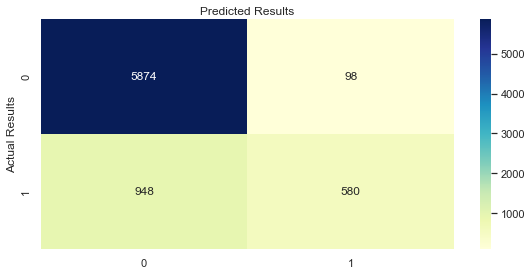

In [59]:
c_m(Y_train_val, y_pred)

Model's Accuracy: 0.8476
Model's Misclassification: 0.1524
Model's Specificity: 0.9693621295831241
Model's Sensitivity: 0.3713163064833006


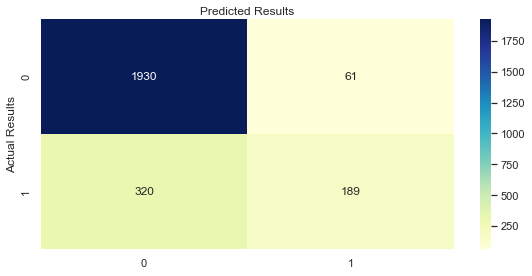

In [60]:
y_pred_test=knn.predict(X_test) 
c_m(Y_test, y_pred_test)

In [61]:
# record the results
df_results.loc[3] = [
                    'KNN',
                    0.8605333333333334,
                    0.8476,
                    (1-0.8476),
                    0.9693621295831241,
                    0.3713163064833006,
                        ]
df_results

,model,accuracy_valid,accuracy_test,Misclassification,Specificity,Sensitivity
0,Logistic Regression,0.636000,0.6624,0.3376,0.634355,0.772102
1,Random Forest,0.861333,0.8672,0.1328,0.882651,0.776758
2,SVM,0.860000,0.8632,0.1368,0.974385,0.428291
3,KNN,0.860533,0.8476,0.1524,0.969362,0.371316


## 6.5. Gradient Boosting Classifier

Gradient Boosting Classifier is one of the variants of enseble methods which create multiple weak classification models, in our case decision trees, and combine their results to get better performace as a whole. Here, a baseline model of the classifier will be created, finetuned and optimized in order to perform comparisons between its predictive power. 

Accuracy of the training set of the baseline model: 0.8745
Model's Accuracy: 0.858
Model's Misclassification: 0.142
Model's Specificity: 0.8685199098422239
Model's Sensitivity: 0.7751479289940828


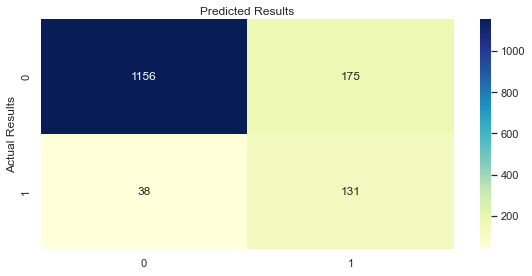

In [69]:
# Creating the baseline model of Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=0)
# Fit the model
gb.fit(X_train, Y_train)

# Finding the training accuracy
print('Accuracy of the training set of the baseline model:', accuracy_score(Y_train, gb.predict(X_train)))
# Use the model to predict
y_pred = gb.predict(X_valid)   
print('==================')
c_m(y_pred, Y_valid)           

It can be seen that the baseline model doesn't seem to overfit the training set and it's accuracy is the second highest after KNN classifier. However, 82% of miss classifications appeared to fall into False Positive and only 18% on False Negative meaning that most of the cases (78%) of exited customers was captured by the classifier. So in order to improve this classification results, cross validation grid search was applied in order to find the best hyper parameters for the model.

The examined hyperparameters are the following:
- Learning rate : (or shrinkage) Scaler of the results of each used tree
- n_estimators : Number of trees that the model uses in order to provide the predictions
- max_features : Number of features of the dataset used from each tree to predict the label feature

In [63]:
# Initialize the initial model
gb = GradientBoostingClassifier(random_state=0)

# Create the ranges of the parameters to tune
tuned_parameters = [
    {'learning_rate' : [1, 0.5, 0.1, 0.05, 0.01],
     'n_estimators' : [8,16,32,64,100,200],
     'max_features' : list(range(4, X_train.shape[1]))
    } 
]

# Define the scores
scores =['accuracy']   #,'precision','recall']

# Creating the instance of the cross validation
for score in scores:
    clf = GridSearchCV(gb, tuned_parameters, scoring=score, cv=5)
    clf.fit(X_train, Y_train)

print('''
Best parameters set found on development set:
=============================================
''')
print(clf.best_params_)



Best parameters set found on development set:

{'learning_rate': 0.05, 'max_features': 7, 'n_estimators': 200}


It can be seen that the optimal hyper parameters of the model are the following:

- learning rate: 0.05
- max_features : 7
- n_estimators : 200

So a smaller learning rate will be applied in the trade off a bigger number of trees created, which is diserable based on empirical results founded in literacure, which states that small values of shrinkage (s <= 0.1) lead to much better generalization error. 

Source: https://jerryfriedman.su.domains/ftp/stobst.pdf

Accuracy of the training set of the baseline model: 0.8745
Model's Accuracy: 0.8586666666666667
Model's Misclassification: 0.14133333333333334
Model's Specificity: 0.8697289156626506
Model's Sensitivity: 0.7732558139534884


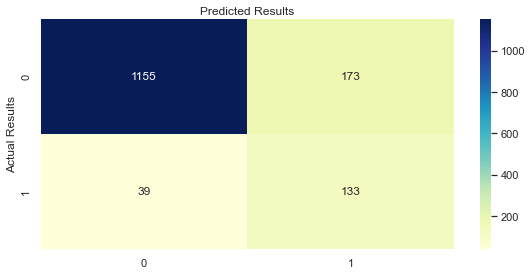

In [70]:
# Initialize the optimal model
gb_best = GradientBoostingClassifier(learning_rate= 0.05, max_features= 7, n_estimators =200, random_state=0)

# Fit the model
gb_best.fit(X_train, Y_train)

# Finding the training accuracy
print('Accuracy of the training set of the baseline model:', accuracy_score(Y_train, gb.predict(X_train)))

# Use the model to predict
y_pred = gb_best.predict(X_valid)    
print('==================')
c_m(y_pred, Y_valid)                 

After the optimisation of the model it can be seen that accuracy of the model remain the same compared to the baseline model with slight imporvement at the misclassifications of the classifiers. Still, the majority of misclassified cases are appeared at False Positive side of the confusion matrix with a slight decrease in the correct prediction of exited clients. 

Model's Accuracy: 0.8704
Model's Misclassification: 0.1296
Model's Specificity: 0.8825149150986691
Model's Sensitivity: 0.7881619937694704


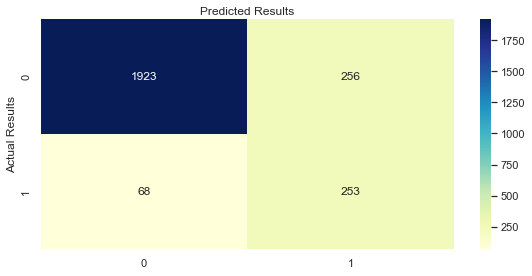

In [71]:
y_pred_test = gb_best.predict(X_test)
c_m(y_pred_test, Y_test)         

In [66]:
# record the results
df_results.loc[4] = [
                    'Gradient Boosting',
                    0.8586666666666667,
                    0.8704,
                    (1-0.8704),
                    0.8825149150986691,
                    0.7881619937694704,
                        ]

In [72]:
# Display the importance of each selected feature
variables = pd.DataFrame({'Features': list(X_train.columns) , 'Importance': list(gb_best.feature_importances_)})
variables
variables.columns = ['variable_name', 'GB_Importance']


df_varaible['GB_Importance'] = 0
# feature_scores to dataframe
df_feature_scores_list = variables['variable_name'].tolist()

for i in range(len(df_feature_scores_list)):
    df_varaible.loc[df_varaible['variable_name']==f"{df_feature_scores_list[i]}",'GB_Importance'] = variables['GB_Importance'][i]

variables

,variable_name,GB_Importance
0,CreditScore,0.020940
1,Age,0.378898
2,Tenure,0.006704
3,Balance,0.075038
4,NumOfProducts,0.312263
5,HasCrCard,0.001341
6,IsActiveMember,0.109708
7,EstimatedSalary,0.017746
8,Geography_Germany,0.060635
9,Geography_Spain,0.000343


Lastly, regarding the variables' importance, it can be observed that the age and number of bank products used by the customer are the main factors that drive the classification results following by the information of if the custormer is active member of the bank or not.

# 7. Recording Final Accuracies of Classifiers Models

In [125]:
df_varaible

,variable_name,coef_logm,var_imp_RF,DT_Importance,GB_Importance
0,CreditScore,-0.060375,0.118656,0.231518,0.020940
1,Age,0.737771,0.272135,0.060124,0.378898
2,Tenure,-0.038241,0.034205,0.031852,0.006704
3,Balance,0.175221,0.134039,0.023958,0.075038
4,NumOfProducts,-0.063895,0.150355,0.356442,0.312263
5,HasCrCard,-0.065844,0.015929,0.000000,0.001341
6,IsActiveMember,-1.012519,0.120361,0.139047,0.109708
7,EstimatedSalary,0.026367,0.052281,0.091699,0.017746
9,Geography_Spain,0.078967,0.011667,0.013807,0.000343
10,Gender_Male,-0.546379,0.020743,0.046830,0.016385


In [128]:
df_results

,model,accuracy_valid,accuracy_test,Misclassification,Specificity,Sensitivity
0,Logistic Regression,0.636000,0.6624,0.3376,0.634355,0.772102
1,Random Forest,0.861333,0.8672,0.1328,0.882651,0.776758
2,SVM,0.860000,0.8632,0.1368,0.974385,0.428291
3,KNN,0.860533,0.8476,0.1524,0.969362,0.371316
4,Gradient Boosting,0.858667,0.8704,0.1296,0.882515,0.788162


# 8. Other Method: Deep Learning

## 8.1. Basic FF NN

In [134]:
# clean sessions and set seeds
tf.keras.backend.clear_session()
np.random.seed(231)
tf.random.set_seed(631)

In [135]:
# create tensorflow model
model_benchmarking = tf.keras.models.Sequential([ 
    tf.keras.layers.Dense(100, kernel_initializer = 'uniform',activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(100, kernel_initializer = 'uniform',activation="relu"),
    tf.keras.layers.Dense(1, kernel_initializer = 'uniform', activation="sigmoid")
    ])

# # early_stopping
# early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
# compile the model
model_benchmarking.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), # this is very important, otherwise wuill overfit
              metrics=["accuracy"])
# keep track of the perforance
log = model_benchmarking.fit(X_train, Y_train, 
                epochs=100, 
                validation_data=(X_valid, Y_valid),
               )

print("MSE on test set: " + str(model_benchmarking.evaluate(X_test, Y_test)))


Epoch 1/100
 18/188 [=>............................] - ETA: 1s - loss: 0.6839 - accuracy: 0.8056

2022-07-15 02:56:44.828343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - ETA: 0s - loss: 0.6294 - accuracy: 0.7953

2022-07-15 02:56:46.089911: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


188/188 [==============================] - 2s 8ms/step - loss: 0.6294 - accuracy: 0.7953 - val_loss: 0.5826 - val_accuracy: 0.7960
Epoch 2/100
188/188 [==============================] - 1s 7ms/step - loss: 0.5572 - accuracy: 0.7963 - val_loss: 0.5383 - val_accuracy: 0.7960
Epoch 3/100
188/188 [==============================] - 1s 6ms/step - loss: 0.5273 - accuracy: 0.7963 - val_loss: 0.5193 - val_accuracy: 0.7960
Epoch 4/100
188/188 [==============================] - 1s 6ms/step - loss: 0.5143 - accuracy: 0.7963 - val_loss: 0.5111 - val_accuracy: 0.7960
Epoch 5/100
188/188 [==============================] - 1s 7ms/step - loss: 0.5084 - accuracy: 0.7963 - val_loss: 0.5071 - val_accuracy: 0.7960
Epoch 6/100
188/188 [==============================] - 1s 6ms/step - loss: 0.5055 - accuracy: 0.7963 - val_loss: 0.5051 - val_accuracy: 0.7960
Epoch 7/100
188/188 [==============================] - 1s 6ms/step - loss: 0.5038 - accuracy: 0.7963 - val_loss: 0.5038 - val_accuracy: 0.7960
Epoch 8/100

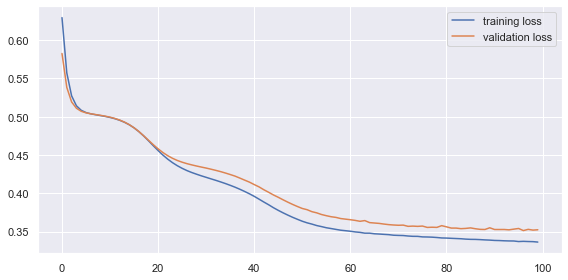

In [136]:
# visualise the lost 
plt.plot(log.history['loss'],label = "training loss")
plt.plot(log.history['val_loss'], label = "validation loss")
plt.legend()
plt.show()

In [137]:
# evalute the model on test set
model_benchmarking.evaluate(X_test, Y_test)

79/79 [==============================] - 0s 4ms/step - loss: 0.3378 - accuracy: 0.8632


[0.33777478337287903, 0.8632000684738159]

## 8.2. Hyperparameter and layer size tuning - Keras Tuner

In [28]:
# clean sessions and set seeds
tf.keras.backend.clear_session()
np.random.seed(231)
tf.random.set_seed(631)

In [30]:
# build a hyper parameter function to tune the parameters
def train_model_hp(hp):      
       
    # find the best hidden layer size
    model = tf.keras.models.Sequential()
    
    model.add(tf.keras.layers.Dense(100, 
            kernel_initializer = 'uniform',
            activation="relu", 
            input_shape=X_train.shape[1:]))

     # tune the number of layers.
    for i in range(hp.Int('num_layers', 1, 5)):
        model.add(tf.keras.layers.Dense(
            # tune number of units separatel and set max and min value for nuron
            units=hp.Int(f"num_units_{i}", min_value = 50, max_value=200),
            # apply L2 reugularizaton to prevent overfittinng issue
            # kernel_regularizer=tf.keras.regularizers.l2(0.01),
            activation='relu'))
    
    # tune whether to use dropout for layers 
    if hp.Boolean("dropout"):
        # set a drop out rate ranging from 0.1 to 03
        model.add(tf.keras.layers.Dropout(rate=hp.Float('dropout_rate', min_value = 0.1, max_value=0.3)))
        
    # add output layer 
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    # define a choice of optimizer 
    optim_algo = hp.Choice('optimizer', values=['sgd','adam']) 
    # define the range of learning rate 
    learning_rate = hp.Float('learning_rate', min_value=0.001, max_value=0.1, sampling="log") # change the laerning
    
    # tune wether to use sgd or adam optimizer 
    if optim_algo == 'sgd':
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate,clipvalue=1)
    elif optim_algo == 'adam':
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    # compile the model    
    model.compile(  optimizer=optimizer,
                    # add loss function, in this case, the result will be binary 
                    loss='binary_crossentropy',
                    # define metrics to show 
                    metrics=["accuracy", 
                            tf.keras.metrics.TruePositives(name="tp"),
                            tf.keras.metrics.AUC(name='auc')
                            ])
    return model

train_model_hp(kt.HyperParameters())


##### ??? Bias and Variance checking - Use different tools such as batch normalisation ???

In [31]:
# create tunner
tuner = kt.Hyperband(train_model_hp,
                     # set an obejective of minimise loss
                     objective='val_loss',
                     max_epochs=100,
                     factor=3,
                     seed=235,
                    #  directory='/Users/timliu/Documents/GitHub/SMM284',
                    #  project_name='train_model_hp'
                    )
# find the best values
tuner.search(X_train, Y_train, validation_data=(X_valid,Y_valid))

Trial 254 Complete [00h 00m 31s]
val_loss: 0.36389145255088806

Best val_loss So Far: 0.35074862837791443
Total elapsed time: 00h 15m 22s
INFO:tensorflow:Oracle triggered exit


In [32]:
# get the best hyperparameters
best_hps = tuner.get_best_hyperparameters()[0]

# print out the best parameters
print("\033[1m---------------------Best Parameters---------------------\033[0m")
print("Best number of hidden layers: " + str(best_hps['num_layers']))
print("Best learning rate: " + str(best_hps['learning_rate']))
print("Best optimizer: " + str(best_hps['optimizer']))
print("Best dropout rate: " + str(best_hps['dropout_rate']))

---------------------Best Parameters---------------------
Best number of hidden layers: 1
Best learning rate: 0.02037395355037822
Best optimizer: adam
Best dropout rate: 0.25918727441508216


In [33]:
# clean sessions and set seeds
tf.keras.backend.clear_session()
np.random.seed(231)
tf.random.set_seed(631)

In [34]:
# create the best model
model_modify = tuner.hypermodel.build(best_hps)

#create another model
log_modify = model_modify.fit(X_train, Y_train,
               epochs=100,
               validation_data=(X_valid,Y_valid),)
#                callbacks=[early_stopping_cb])


print("MSE on test set: " + str(model_modify.evaluate(X_test, Y_test)))


Epoch 1/100
188/188 [==============================] - 1s 2ms/step - loss: 0.4697 - accuracy: 0.8200 - tp: 327.0000 - auc: 0.7872 - val_loss: 0.4167 - val_accuracy: 0.8207 - val_tp: 45.0000 - val_auc: 0.8295
Epoch 2/100
188/188 [==============================] - 0s 1ms/step - loss: 0.4031 - accuracy: 0.8377 - tp: 466.0000 - auc: 0.8204 - val_loss: 0.3973 - val_accuracy: 0.8300 - val_tp: 104.0000 - val_auc: 0.8274
Epoch 3/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3885 - accuracy: 0.8438 - tp: 496.0000 - auc: 0.8293 - val_loss: 0.3909 - val_accuracy: 0.8393 - val_tp: 92.0000 - val_auc: 0.8305
Epoch 4/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3782 - accuracy: 0.8487 - tp: 521.0000 - auc: 0.8361 - val_loss: 0.3863 - val_accuracy: 0.8380 - val_tp: 84.0000 - val_auc: 0.8493
Epoch 5/100
188/188 [==============================] - 0s 1ms/step - loss: 0.3680 - accuracy: 0.8507 - tp: 532.0000 - auc: 0.8451 - val_loss: 0.3666 - val_accuracy: 0.

In [35]:
model_modify.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1200      
                                                                 
 dense_1 (Dense)             (None, 172)               17372     
                                                                 
 dense_2 (Dense)             (None, 1)                 173       
                                                                 
Total params: 18,745
Trainable params: 18,745
Non-trainable params: 0
_________________________________________________________________


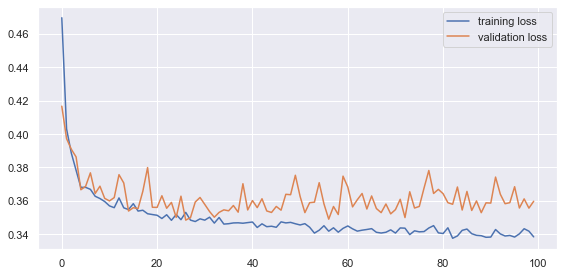

79/79 [==============================] - 0s 724us/step - loss: 0.3502 - accuracy: 0.8600 - tp: 284.0000 - auc: 0.8627


[0.350203275680542, 0.8600000143051147, 284.0, 0.8627383708953857]

In [36]:
# visualise the lost 
plt.plot(log_modify.history['loss'],label = "training loss")
plt.plot(log_modify.history['val_loss'], label = "validation loss")
plt.legend()
plt.show()
# evalute the model on test set
model_modify.evaluate(X_test, Y_test)

In [37]:
# make prediction on test set
Y_prob = model_modify.predict(X_test)
Y_prob = Y_prob.reshape(-1,)
Y_prob = [ y for y in Y_prob]

# get the AUC score
roc_auc_score(Y_test, Y_prob)

0.8626974627473929

# 9. Accuracies: Classifers vs NN 

# 10. Business Implication 